In [1]:
import TimeSliceImport
import RamanPlotTools as pt
from sklearn import (neural_network,metrics,preprocessing)
import matplotlib.pyplot as plt
import numpy as np

In [8]:
path="/Users/morten/Desktop/SKYP_KYP_SYP/"
start=201
end=1600
points=1000
types=["yeast","PS","spore", "kleb"]
spectra=TimeSliceImport.importData(path,types)
classes=list(map(lambda x:TimeSliceImport.RamanSample.mappings[x],types))
sortedTypesTuples=sorted(zip(types,classes),key=lambda x:x[1])
sortedTypes=[x[0] for x in sortedTypesTuples]

trainingSamples, validationSamples = TimeSliceImport.splitData(spectra, 0.25)
trainingSpectraList = list(map(lambda x: x.interpolatedSpectra(start, end, points), trainingSamples))
validationSpectraList = list(map(lambda x: x.interpolatedSpectra(start, end, points), validationSamples))
trainingData,trainingClasses,validationData,validationClasses = TimeSliceImport.makeSVMInputData(trainingSpectraList, validationSpectraList)



In [7]:

clf = neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20,), random_state=1,verbose=1,max_iter=1000)
clf.fit(trainingData,trainingClasses)
score=clf.score(validationData,validationClasses)
result=clf.predict(validationData)
print("Score %f" % score)

pt.plotResult(result,validationClasses,sortedTypes)
mtrx=metrics.confusion_matrix(validationClasses,result)
pt.plotConfusionMatrix(mtrx,sortedTypes,"Classification Result (%.03g )" % score)

KeyboardInterrupt: 

Score 0.671429


ValueError: all the input arrays must have same number of dimensions

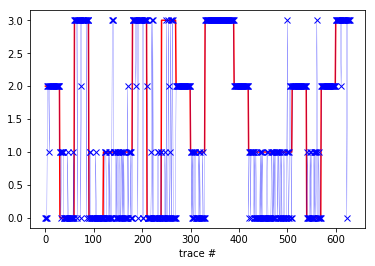

In [23]:
clf = neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20,), random_state=1,verbose=1,max_iter=1000)
oneHotClasses=preprocessing.OneHotEncoder(sparse=False).fit_transform(trainingClasses.reshape(len(trainingClasses), 1))

oneHotValidationClasses=preprocessing.OneHotEncoder(sparse=False).fit_transform(validationClasses.reshape(len(validationClasses), 1))

clf.fit(trainingData,oneHotClasses)
score=clf.score(validationData,oneHotValidationClasses)
result=clf.predict(validationData)
print("Score %f" % score)

scalarResult = np.argmax(result,axis=1)





pt.plotResult(scalarResult,np.argmax(oneHotValidationClasses,axis=1),sortedTypes)

mtrx=metrics.confusion_matrix(truth,scalarResult)
pt.plotConfusionMatrix(mtrx,sortedTypes,"Classification Result (%.03g )" % score)


Score 0.728571
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


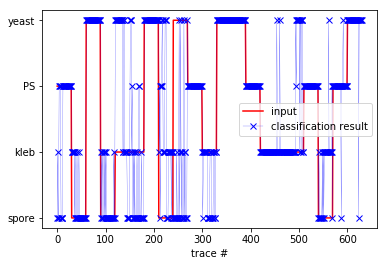

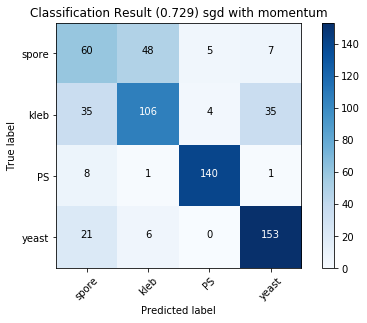

Score 0.685714
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/Users/morten/.local/share/virtualenvs/keras/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


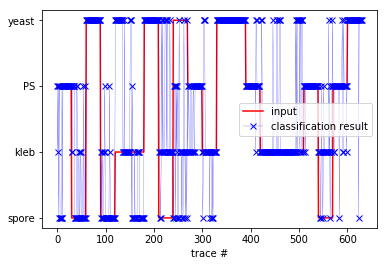

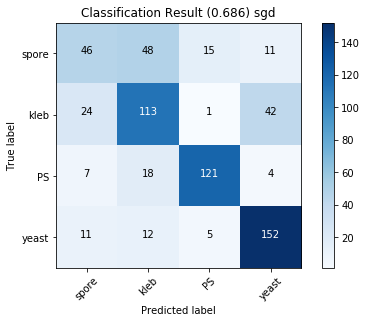

Score 0.674603
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


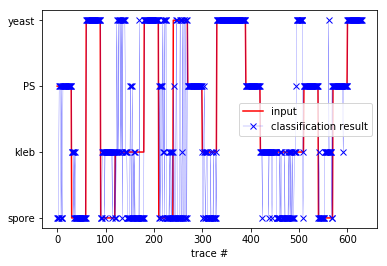

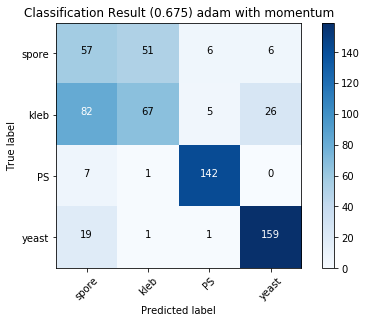

Score 0.674603
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


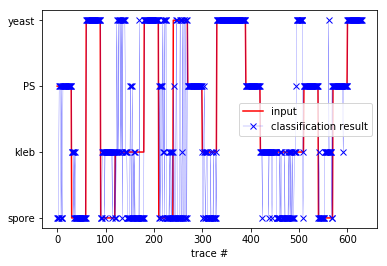

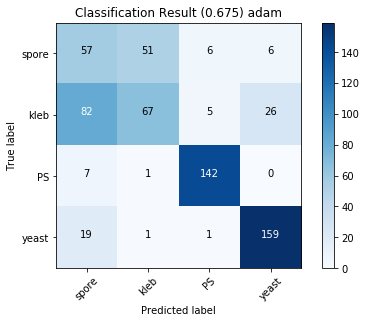

Score 0.761905
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


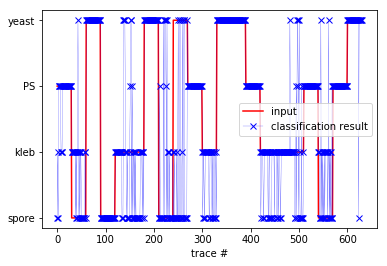

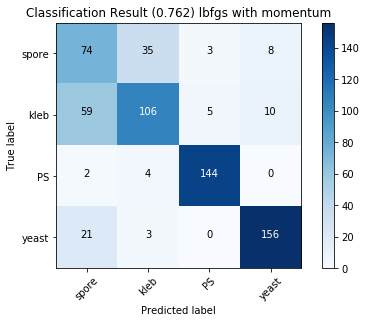

Score 0.761905
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


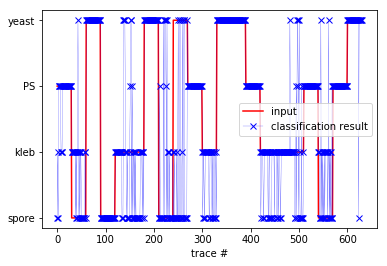

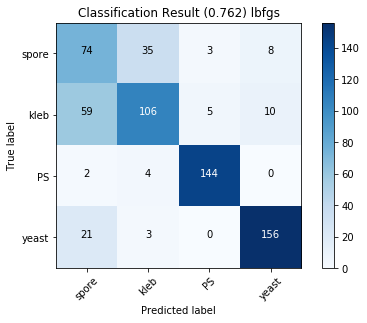

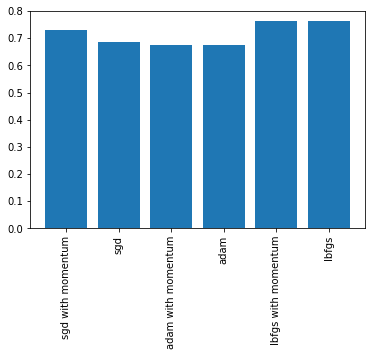

In [24]:
parameters=[{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0.9, 'learning_rate_init': 0.001},
            {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.001},
            {'solver': 'adam', 'learning_rate': 'constant', 'momentum': 0.9, 'learning_rate_init': 0.001},
            {'solver': 'adam', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.001},
            {'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': 0.9, 'learning_rate_init': 0.001},
            {'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.001}
            ]
titles=["sgd with momentum", "sgd", "adam with momentum", "adam", "lbfgs with momentum", "lbfgs"]

results=[]
for p,t in zip(parameters,titles):
    clf = neural_network.MLPClassifier(hidden_layer_sizes=(20,), random_state=1,max_iter=1000, **p)
    clf.fit(trainingData,trainingClasses)
    score=clf.score(validationData,validationClasses)
    result=clf.predict(validationData)
    print("Score %f" % score)
    print(clf.get_params())
    results.append(score)
    pt.plotResult(result,validationClasses,sortedTypes)
    mtrx=metrics.confusion_matrix(validationClasses,result)
    title=("Classification Result (%.3g) " % score) + t
    pt.plotConfusionMatrix(mtrx,sortedTypes,title)


fig, axs = plt.subplots()
axs.bar(titles,results)
plt.xticks(rotation=90)
plt.show()


Score 0.761905
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


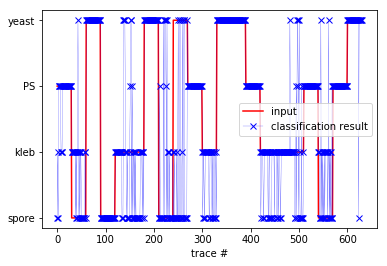

Score 0.765079
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


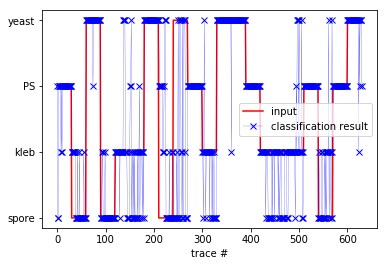

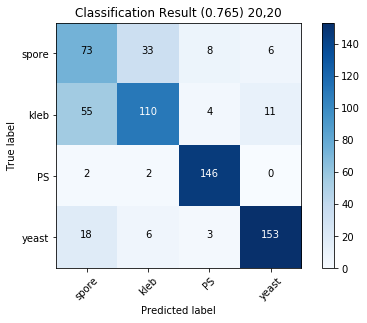

Score 0.731746
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


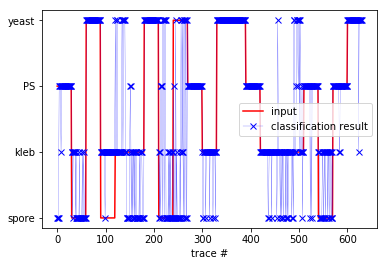

Score 0.739683
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


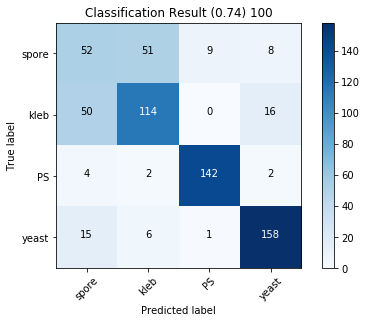

Score 0.733333
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


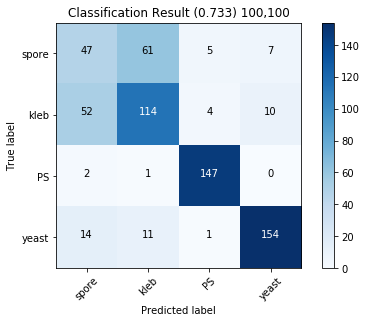

Score 0.790476
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


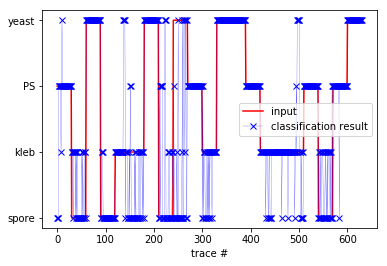

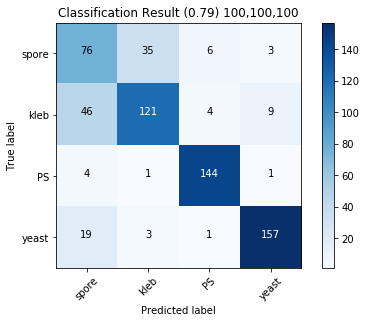

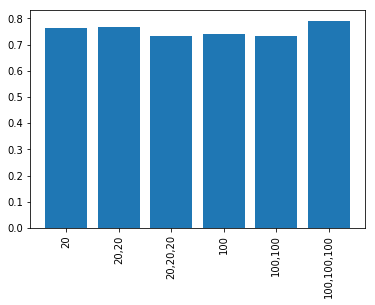

In [25]:
parameters=[{'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': 0.9, 'learning_rate_init': 0.001,'hidden_layer_sizes':(20,)},
            {'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': 0.9, 'learning_rate_init': 0.001,'hidden_layer_sizes':(20,20)},
            {'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': 0.9, 'learning_rate_init': 0.001,'hidden_layer_sizes':(20,20,20)},
            {'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': 0.9, 'learning_rate_init': 0.001,'hidden_layer_sizes':(100,)},
            {'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': 0.9, 'learning_rate_init': 0.001,'hidden_layer_sizes':(100,100)},
            {'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': 0.9, 'learning_rate_init': 0.001,'hidden_layer_sizes':(100,100,100)},
            ]
sizes=[x['hidden_layer_sizes'] for x in parameters]
titles=list(map(lambda x:",".join(str(s) for s in x),sizes))

results=[]
for p,t in zip(parameters,titles):
    clf = neural_network.MLPClassifier(random_state=1,max_iter=1000, **p)
    clf.fit(trainingData,trainingClasses)
    score=clf.score(validationData,validationClasses)
    result=clf.predict(validationData)
    print("Score %f" % score)
    print(clf.get_params())
    results.append(score)
    pt.plotResult(result,validationClasses,sortedTypes)
    mtrx=metrics.confusion_matrix(validationClasses,result)
    title=("Classification Result (%.3g) " % score) + t
    pt.plotConfusionMatrix(mtrx,sortedTypes,title)


fig, axs = plt.subplots()
axs.bar(titles,results)
plt.xticks(rotation=90)
plt.show()



In [17]:
parameters=[{'solver': 'lbfgs', 'learning_rate': 'constant', 'momentum': 0.5, 'learning_rate_init': 0.001,'hidden_layer_sizes':(100,100,100)}]

def makeData(oneHot=False):
    trainingSamples, validationSamples = TimeSliceImport.splitData(spectra, 0.25)
    trainingSpectraList = list(map(lambda x: x.interpolatedSpectra(start, end, points), trainingSamples))
    validationSpectraList = list(map(lambda x: x.interpolatedSpectra(start, end, points), validationSamples))
    trainingData,trainingClasses,validationData,validationClasses = TimeSliceImport.makeSVMInputData(trainingSpectraList, validationSpectraList)
    if(oneHot):
        oneHotClasses=preprocessing.OneHotEncoder(sparse=False).fit_transform(trainingClasses.reshape(len(trainingClasses), 1))
        oneHotValidationClasses=preprocessing.OneHotEncoder(sparse=False).fit_transform(validationClasses.reshape(len(validationClasses), 1))
        return trainingData,oneHotClasses,validationData,oneHotValidationClasses
    else:
        return trainingData,trainingClasses,validationData,validationClasses
    
        
numReps=10 
results=[]
labels=[]
for oneHot in [True,False]:
    itScores=[]
    labels.append(str(oneHot))
    runResults=[]
    truths=[]
    for i in range(numReps):
        trainingData,trainingClasses,validationData,validationClasses=makeData(oneHot)
        clf = neural_network.MLPClassifier(random_state=1,max_iter=1000, **p)
        clf.fit(trainingData,trainingClasses)
        score=clf.score(validationData,validationClasses)
        result=clf.predict(validationData)
        print("Score %f" % score)
#         print(clf.get_params())
        itScores.append(score)
#         pt.plotResult(result,validationClasses,sortedTypes)
        if oneHot:
            truths.extend(np.argmax(validationClasses,axis=1))
            runResults.extend(np.argmax(result,axis=1))
        else:
            truths.extend(validationClasses)
            runResults.extend(result)
        
        
    avgScore=sum(itScores)/float(len(itScores))        
    title=("Classification Result (%.3g) " % score)        
    mtrx=metrics.confusion_matrix(truths,runResults) 
    pt.plotConfusionMatrix(mtrx,sortedTypes,title,normalize=True)
    results.append(itScores)
    
npScores=np.array(results)
plt.boxplot(np.transpose(npScores), labels=labels, showmeans=True)
plt.title("OneHot")

# fig, axs = plt.subplots()
# axs.bar(titles,results)
# plt.xticks(rotation=90)
# plt.show()




Score 0.761905
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.5, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Score 0.719048
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.5, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Score 0.641270
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': '

Score 0.695238
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.5, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Score 0.660317
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.5, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Score 0.744444
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': '

Text(0.5,1,'OneHot')